```
[Title] Autoencoder using Tensorflow.Keras
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents]
 - Aucoencoder for Dimension Reduction
[References]
 - https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
 - https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
```

In [116]:
from keras.layers import Input, Dense
from keras.models import Model

In [117]:
trainFeatures = np.array([
  [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,2,3]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [1,3,5]
])
print(trainFeatures)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 3 5]]


In [118]:
encoding_dim = 2
input_img = Input(shape=(3,))
encoded = Dense(encoding_dim)(input_img)
decoded = Dense(3)(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [119]:
autoencoder.fit(trainFeatures, trainFeatures,
                epochs=100,
                batch_size=2,
                verbose=0,
                shuffle=True)

In [120]:
decoded_imgs = autoencoder.predict(trainFeatures)

In [121]:
decoded_imgs

array([[0.8230039, 0.8563012, 1.2121304],
       [0.8230039, 0.8563012, 1.2121304],
       [0.8230039, 0.8563012, 1.2121304],
       [0.8230039, 0.8563012, 1.2121304],
       [1.743476 , 2.1234775, 2.7361052],
       [1.3603878, 1.9264278, 2.203387 ],
       [1.3603878, 1.9264278, 2.203387 ],
       [1.3603878, 1.9264278, 2.203387 ],
       [1.3603878, 1.9264278, 2.203387 ],
       [2.6639488, 3.390654 , 4.2600803]], dtype=float32)

In [122]:
error = trainFeatures - decoded_imgs

In [123]:
error_square = error**2
error_square

array([[0.03132762, 0.02064935, 0.04499932],
       [0.03132762, 0.02064935, 0.04499932],
       [0.03132762, 0.02064935, 0.04499932],
       [0.03132762, 0.02064935, 0.04499932],
       [0.55275661, 0.01524668, 0.06964046],
       [0.40910376, 0.00541286, 0.04136628],
       [0.40910376, 0.00541286, 0.04136628],
       [0.40910376, 0.00541286, 0.04136628],
       [0.40910376, 0.00541286, 0.04136628],
       [2.76872552, 0.15261062, 0.54748111]])

In [124]:
error_square = np.sum(error_square, axis=1)
error_square

array([0.09697629, 0.09697629, 0.09697629, 0.09697629, 0.63764376,
       0.45588291, 0.45588291, 0.45588291, 0.45588291, 3.46881725])

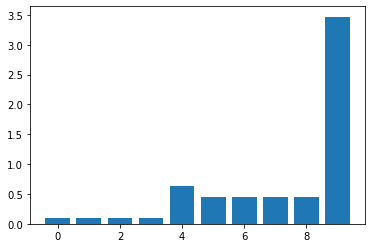

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(10) 
plt.bar(ind, error_square)
plt.show()